In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
mini_pieman = niidb.FMriActivationsDb('data/mini_pieman.db',
                                     mask='data/pieman_data/wholebrain.nii.gz')

In [5]:
dtfa = DTFA.DeepTFA(mini_pieman.all(), mask='data/pieman_data/wholebrain.nii.gz', num_factors=100, embedding_dim=2)

06/11/2018 11:36:10 Loading Nifti image data/pieman_data/sub-001-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False)
06/11/2018 11:36:11 Loading Nifti image data/pieman_data/sub-003-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False)
06/11/2018 11:36:12 Loading Nifti image data/pieman_data/sub-002-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False)


In [6]:
dtfa.normalize_activations()

[tensor(10.8725), tensor(9.7904), tensor(8.5388)]

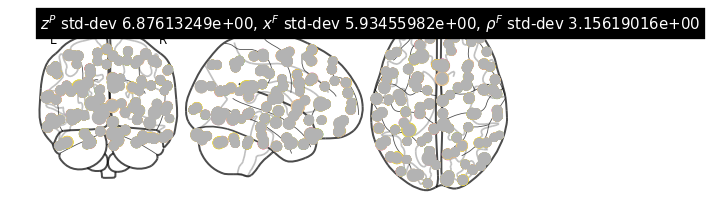

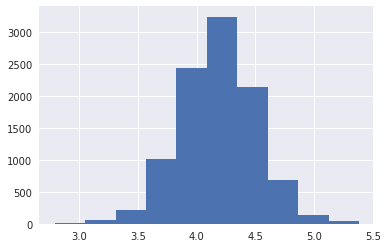

(<nilearn.plotting.displays.OrthoProjector at 0x7f53433f67f0>,
 tensor([[[-5.4826e+01, -5.5881e+01,  4.5454e+01],
          [ 4.5215e+00,  1.0479e+01,  3.9208e+00],
          [-3.4157e+01, -2.4572e+01, -8.6205e+00],
          ...,
          [ 1.1426e+01, -4.1816e+01, -3.2439e+01],
          [-9.9413e+00, -7.3290e+01, -7.9291e+00],
          [-2.1561e+01,  1.1714e+01,  2.8360e+01]],
 
         [[-5.5320e+01, -5.5730e+01,  4.5852e+01],
          [ 5.1738e+00,  1.0628e+01,  4.4249e+00],
          [-3.4167e+01, -2.4589e+01, -8.6834e+00],
          ...,
          [ 1.1643e+01, -4.1703e+01, -3.2249e+01],
          [-1.0104e+01, -7.2988e+01, -7.8565e+00],
          [-2.1427e+01,  1.2187e+01,  2.8080e+01]],
 
         [[-5.5034e+01, -5.5895e+01,  4.5726e+01],
          [ 4.8324e+00,  1.0639e+01,  4.2393e+00],
          [-3.4140e+01, -2.4446e+01, -8.6416e+00],
          ...,
          [ 1.1442e+01, -4.1990e+01, -3.2340e+01],
          [-1.0220e+01, -7.3205e+01, -7.7566e+00],
          [-2.1481e

In [7]:
dtfa.visualize_factor_embedding()

In [8]:
losses = dtfa.train(num_steps=700, learning_rate=1e-2, log_level=logging.INFO, num_particles=2,
                    batch_size=100, use_cuda=True, blocks_batch_size=8, patience=30)

06/11/2018 11:38:12 [Epoch 1] (1371ms) Posterior free-energy 4.47543194e+09 = KL from prior 5.36992961e+05 - log-likelihood -4.47489446e+09
06/11/2018 11:38:13 [Epoch 2] (1269ms) Posterior free-energy 4.38917530e+09 = KL from prior 3.47361602e+05 - log-likelihood -4.38882816e+09
06/11/2018 11:38:14 [Epoch 3] (1265ms) Posterior free-energy 4.09889331e+09 = KL from prior 3.56903438e+05 - log-likelihood -4.09853658e+09
06/11/2018 11:38:15 [Epoch 4] (1275ms) Posterior free-energy 4.02454579e+09 = KL from prior 3.64936953e+05 - log-likelihood -4.02418074e+09
06/11/2018 11:38:17 [Epoch 5] (1275ms) Posterior free-energy 3.96478054e+09 = KL from prior 4.56238008e+05 - log-likelihood -3.96432435e+09
06/11/2018 11:38:18 [Epoch 6] (1267ms) Posterior free-energy 3.93464909e+09 = KL from prior 5.02961688e+05 - log-likelihood -3.93414618e+09
06/11/2018 11:38:19 [Epoch 7] (1263ms) Posterior free-energy 3.92105728e+09 = KL from prior 5.46631172e+05 - log-likelihood -3.92051059e+09
06/11/2018 11:38:20 

Epoch   553: reducing learning rate of group 0 to 5.0000e-03.


06/11/2018 11:49:46 [Epoch 555] (1239ms) Posterior free-energy 2.49993626e+09 = KL from prior 1.16512462e+06 - log-likelihood -2.49877114e+09
06/11/2018 11:49:47 [Epoch 556] (1251ms) Posterior free-energy 2.50117632e+09 = KL from prior 1.15070428e+06 - log-likelihood -2.50002566e+09
06/11/2018 11:49:48 [Epoch 557] (1228ms) Posterior free-energy 2.49849856e+09 = KL from prior 1.16598994e+06 - log-likelihood -2.49733248e+09
06/11/2018 11:49:49 [Epoch 558] (1227ms) Posterior free-energy 2.49751475e+09 = KL from prior 1.17254541e+06 - log-likelihood -2.49634227e+09
06/11/2018 11:49:51 [Epoch 559] (1234ms) Posterior free-energy 2.49550950e+09 = KL from prior 1.17946556e+06 - log-likelihood -2.49433005e+09
06/11/2018 11:49:52 [Epoch 560] (1302ms) Posterior free-energy 2.49697638e+09 = KL from prior 1.17348891e+06 - log-likelihood -2.49580288e+09
06/11/2018 11:49:53 [Epoch 561] (1314ms) Posterior free-energy 2.49783475e+09 = KL from prior 1.18194562e+06 - log-likelihood -2.49665280e+09
06/11/

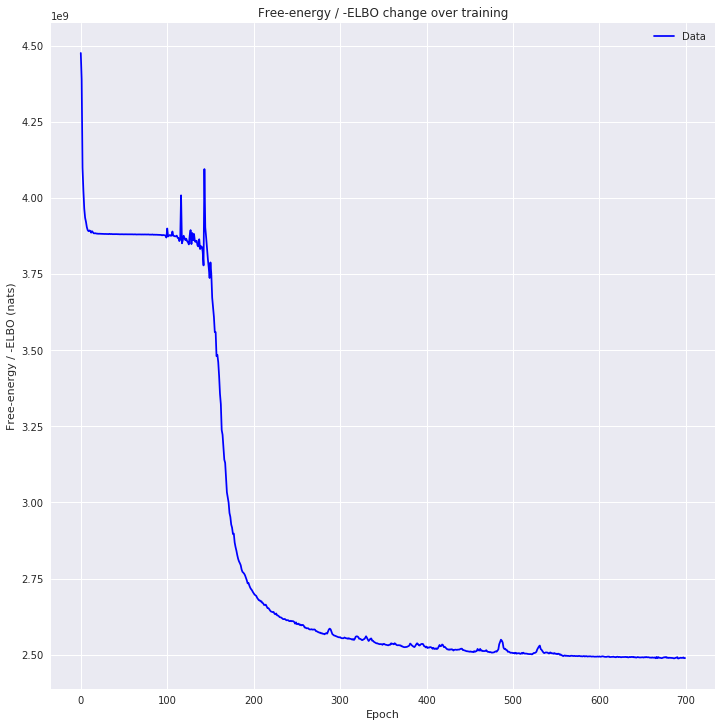

In [9]:
utils.plot_losses(losses)

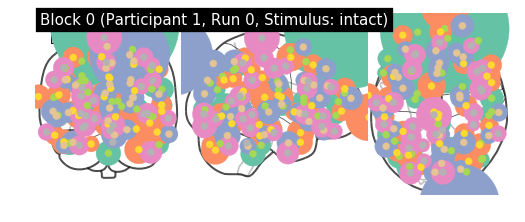

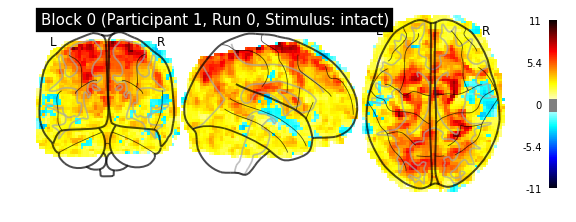

06/11/2018 11:53:22 Reconstruction Error (Frobenius Norm): 4.14163623e+03 out of 5.08479883e+03


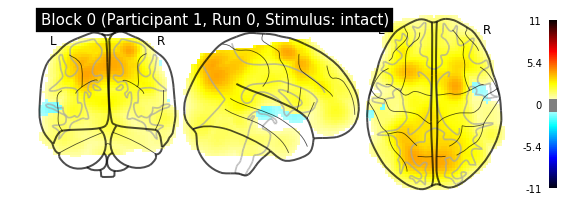

{'weights': tensor([[ 8.4070e-01,  3.0758e+00, -1.3201e+00,  ...,  2.2418e+00,
          3.5109e-01, -2.3318e-01],
        [ 5.1738e-01,  2.1717e+00, -5.5112e-01,  ...,  1.7696e+00,
         -1.1145e+00,  9.5885e-01],
        [ 1.0593e+00,  7.2418e-01, -3.0771e-01,  ...,  1.5223e+00,
         -6.7418e-01,  1.2303e+00],
        ...,
        [-2.5362e-01, -5.8544e-01, -1.5980e+00,  ...,  1.8438e+00,
          7.1940e-01,  1.6500e-01],
        [ 5.5820e-01, -9.4257e-01, -9.6035e-01,  ...,  2.1673e+00,
          7.7406e-01, -9.6806e-01],
        [ 6.8054e-01, -1.0798e+00,  8.0833e-01,  ...,  2.9882e+00,
          1.0385e+00, -1.7515e-01]]), 'factors': tensor([[ 0.0001,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0001,  0.0001,  0.0001,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

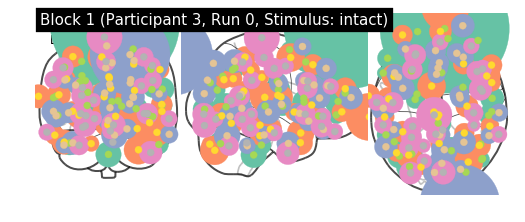

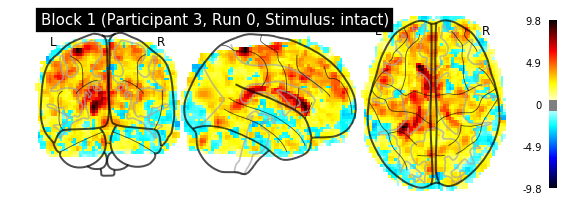

06/11/2018 11:53:51 Reconstruction Error (Frobenius Norm): 4.29807373e+03 out of 5.19534326e+03


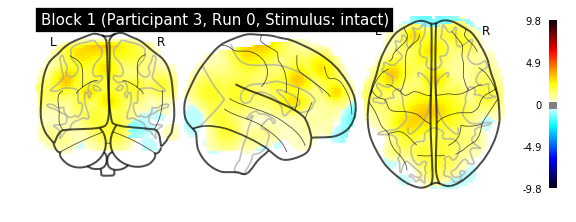

{'weights': tensor([[-1.7549e+00,  4.0661e+00, -5.2143e-01,  ...,  2.4545e+00,
          8.5770e-01, -4.0498e-01],
        [-9.4659e-01,  6.9177e-01,  6.1396e-01,  ...,  2.4512e+00,
         -3.8866e-01,  7.6438e-01],
        [-9.6059e-01,  1.2482e+00, -3.2869e-01,  ...,  1.7873e+00,
          4.2953e-01,  1.1093e+00],
        ...,
        [ 2.9022e-01, -1.0295e+00,  1.4232e+00,  ...,  2.2351e+00,
          1.4329e+00, -2.4907e+00],
        [ 9.8933e-01, -1.7071e+00,  1.4680e+00,  ...,  2.0108e+00,
          2.2064e+00, -2.4932e+00],
        [ 3.9351e-01, -6.5521e-01,  4.5392e-01,  ...,  1.7204e+00,
          1.8117e+00, -2.4725e+00]]), 'factors': tensor([[ 0.0001,  0.0000,  0.0001,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0001,  0.0001,  0.0001,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

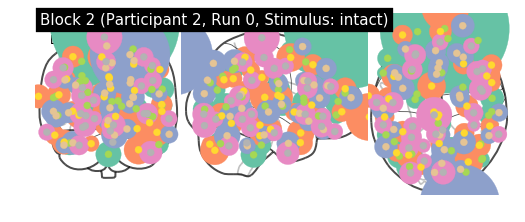

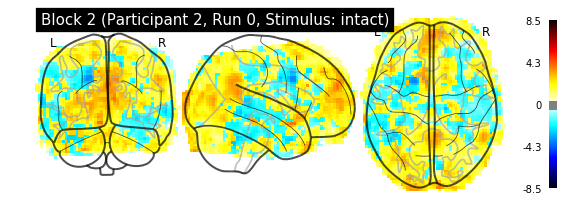

06/11/2018 11:54:20 Reconstruction Error (Frobenius Norm): 4.03869238e+03 out of 5.19534229e+03


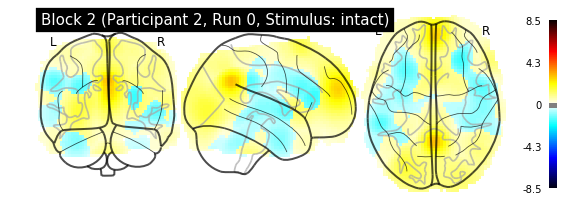

{'weights': tensor([[ 4.2186e-01,  1.2098e+00,  1.1968e+00,  ...,  1.5507e+00,
         -9.4951e-01, -1.6144e+00],
        [-1.2271e+00,  3.4654e-01,  3.9733e-01,  ...,  1.2484e+00,
          4.6458e-01, -6.9402e-01],
        [-2.4076e+00, -4.2288e-01,  6.1011e-01,  ...,  1.4426e+00,
          3.1517e-01, -5.1635e-01],
        ...,
        [ 9.4171e-01, -1.0187e+00,  1.0090e+00,  ...,  2.6315e+00,
          1.1147e+00,  1.5093e-01],
        [ 1.1459e+00, -8.4656e-01, -4.1471e-01,  ...,  2.2413e+00,
          8.6581e-01, -7.8735e-01],
        [ 2.1856e+00, -1.3718e+00, -8.4435e-01,  ...,  1.6412e+00,
          4.2247e-01, -9.4612e-01]]), 'factors': tensor([[ 0.0001,  0.0000,  0.0001,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0001,  0.0001,  0.0001,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

In [10]:
for b in range(dtfa.num_blocks):
    dtfa.plot_factor_centers(b)
    dtfa.plot_original_brain(b)
    dtfa.plot_reconstruction(b)
    print(dtfa.results(b))

In [11]:
def task_rest_labeler(block):
    if 'rest' in block.task:
        return 'Rest'
    else:
        return 'Task'

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


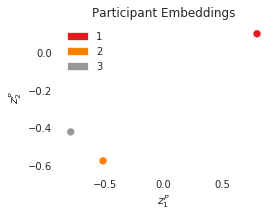

In [12]:
dtfa.scatter_subject_embedding(labeler=lambda block: block.subject)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


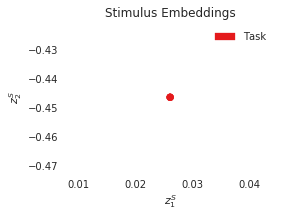

In [13]:
dtfa.scatter_task_embedding(labeler=task_rest_labeler)

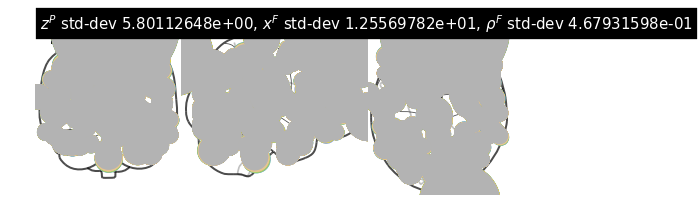

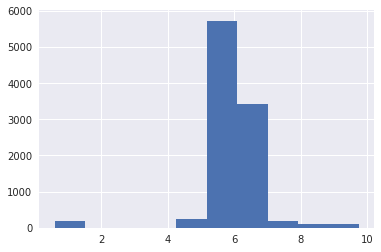

(<nilearn.plotting.displays.OrthoProjector at 0x7f5308f45b00>,
 tensor([[[-4.5360e+01, -5.4371e+01,  4.2564e+01],
          [ 4.1934e+00,  1.6009e+01,  8.4104e+00],
          [-2.1989e+01, -5.2208e+00,  4.0357e+00],
          ...,
          [ 4.6483e+00, -4.3463e+01, -3.4395e+01],
          [-1.4818e+01, -7.6039e+01, -9.4509e+00],
          [-2.7493e+01,  1.9454e+01,  2.2445e+01]],
 
         [[-4.7587e+01, -5.8061e+01,  4.7483e+01],
          [ 3.0672e+00,  1.7701e+01,  8.1918e+00],
          [-2.3031e+01, -7.6013e+00,  3.8053e+00],
          ...,
          [ 5.1222e+00, -4.3300e+01, -3.4262e+01],
          [-1.4002e+01, -7.5974e+01, -9.5366e+00],
          [-2.6495e+01,  2.1081e+01,  2.4015e+01]],
 
         [[-4.6249e+01, -5.5936e+01,  4.4721e+01],
          [ 3.6748e+00,  1.6890e+01,  8.3627e+00],
          [-2.2246e+01, -5.8851e+00,  4.1629e+00],
          ...,
          [ 4.7897e+00, -4.3442e+01, -3.4363e+01],
          [-1.4558e+01, -7.6060e+01, -9.5531e+00],
          [-2.7149e

In [14]:
dtfa.visualize_factor_embedding()

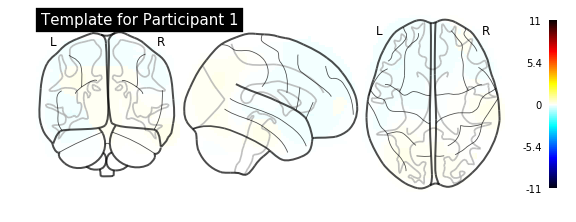

In [15]:
dtfa.plot_subject_template(1)

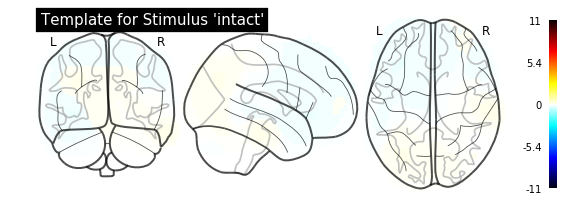

In [16]:
dtfa.plot_task_template('intact')